In [1]:
import pandas as pd

In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [12]:
df.rename(columns = {"Sex" : "Gender"},inplace = True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop irrelevant columns

In [15]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1, inplace = True)

In [16]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Fill missing values

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [21]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Convert categorical to numeric

In [25]:
df = pd.get_dummies(df,drop_first = True)
df = df.astype(int)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7,1,0,1
1,1,1,38,1,0,71,0,0,0
2,1,3,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,1
4,0,3,35,0,0,8,1,0,1


## EDA & Visualization

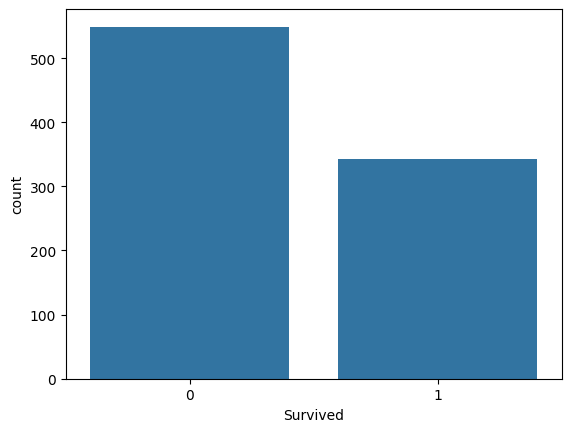

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Survived', data = df)
plt.show()

##  Train Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = df.drop('Survived', axis=1)  
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# 2. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# 3. Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluate Models

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': log_model,
    'Decision Tree': tree_model,
    'Random Forest': forest_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888

Model: Decision Tree
Accuracy: 0.7932960893854749
Precision: 0.7605633802816901
Recall: 0.7297297297297297
F1 Score: 0.7448275862068966

Model: Random Forest
Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552


## visualize the comparison 

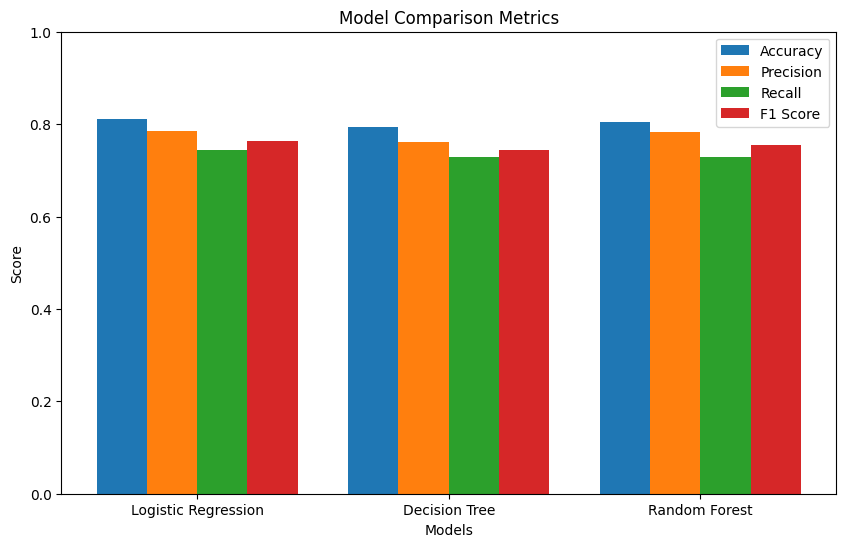

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy = [0.8100558659217877, 0.7932960893854749, 0.8044692737430168]
precision = [0.7857142857142857, 0.7605633802816901, 0.782608695652174]
recall = [0.7432432432432432, 0.7297297297297297, 0.7297297297297297]
f1 = [0.7638888888888888, 0.7448275862068966, 0.7552447552447552]

# Combine metrics into a dictionary for easy plotting
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}

# Plotting
x = np.arange(len(model_names))  # positions for bars
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(10,6))

# Plot each metric with an offset
ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5*width, precision, width, label='Precision')
ax.bar(x + 0.5*width, recall, width, label='Recall')
ax.bar(x + 1.5*width, f1, width, label='F1 Score')

# Add details
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Comparison Metrics")
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
plt.ylim(0,1)  # keep scale between 0 and 1
plt.show()
